<img src="imgs/dh_logo.png" align="right" width="50%">

# Introdução

#### Nos próximos dois encontros, focaremos em um dos problemas mais tradicionais de `machine learning`, a clusterização, ou  [`clustering`](https://towardsdatascience.com/tagged/clustering). Muitas vezes, ao adquirir nossos dados, precisamos deles classificados para realizar nossas análises. Porém, é possível que os dados que você esteja tratando não carreguem labels de agrupamento. Nesse caso, o que fazemos? 

#### Para esse problema, podemos utilizar algoritmos de [`clustering`](https://scikit-learn.org/stable/modules/clustering.html#k-means) que, de modo [`não-supervisionado`](https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a), conseguem identificar padrões no nosso dataset e separá-lo em grupos.
________

# Dica: Debugging e StackOverflow

#### Precisamos nos tornar cada vez mais independentes para resolver `bugs` nos nossos códigos, pois isso é natural no nosso dia-a-dia. Algumas dicas que separei:

- Leia o `bug` - Um bug é lido de baixo para cima. Boas linguagens e pacotes possuem ótimos `prints` de `bugs`, e podem te nortear para resolver o problema;
    
- Quando quiser usar a comunidade, literalmente copie o último `print` do `bug` e coloque na sua barra de busca;

- Use o  [StackOverflow](https://medium.freecodecamp.org/5-steps-to-become-a-better-stack-overflow-user-4ce85711c0f9), formulando perguntas [objetivas](https://stackoverflow.com/help/how-to-ask).

_____________

## CLustering.

#### Cada algoritmo de agrupamento vem em duas variantes: uma classe, que implementa o método [`fit`]() de ajuste para aprender os agrupamentos em dados de treinamento e uma função que, dados os dados de treinamento, retorna uma matriz de rótulos de inteiros correspondentes aos diferentes agrupamentos, os rótulos nos dados de treinamento podem ser encontrados no atributo [`labels()`]().

### Dados de entrada

Uma coisa importante a notar é que os algoritmos implementados neste módulo podem ter diferentes tipos de matriz como entrada. Todos os métodos aceitam matrizes de dados padrão de forma: `(n_samples, n_samples)`. Estes podem ser obtidos das classes no módulo [`sklearn.feature_extraction()`](https://scikit-learn.org/stable/modules/feature_extraction.html). Para [`AffinityPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html), [`SpectralClustering`]() e [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) também é possível inserir matrizes de similaridade de forma `(n_samples, n_samples)`. Estes podem ser obtidos a partir das funções no módulo [`sklearn.metrics.pairwise_distances()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html).

### Métodos de Clustering

<img src="clustering.png" align="center" width="75%">

# Clusterizando Dados Artificiais

#### Nessa aula, vamos começar com um exemplo mais didático e com dados gerados randomicamente pela função [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html). A ideia será gerar dados aritificiais em $3$ dimensões e aplicar o [`kMeans`](https://towardsdatascience.com/k-means-a-complete-introduction-1702af9cd8c) para clusterizá-los. Vamos começar importando $2$ módulos para plotagem e geração dos dados artificiais e preparando o nosso plot.

<img src="make_blobs.png" align="center" width="65%">

-----------------

## K-Means

#### Precisamos, agora, utilizar algum método para realizar a clusterização de nossos dados. Um dos algoritmos mais simples para isso é o [`K-Means`](https://scikit-learn.org/stable/modules/clustering.html#k-means), que consiste dos seguintes passos:

- Iniciar `k` centroides randômicos no nosso `dataset`. No caso, `k` é um [`hiperparâmetro`](https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3) e indica quantos `clusters` estamos procurando;

- Calcular a distância de cada ponto em relação a cada um desses centroides. Assimilar o ponto ao `cluster` cujo centroide estiver mais próximo;

- Depois que todos os pontos estiverem assimilados a algum `cluster`, calcular o ponto médio de cada um desses `k` `clusters`, daí o nome, [`k-means`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Esse ponto médio será o novo centroide;

- Repetir o processo até que a variância se estabilize.

# Entendendo o funcionamento do K-Means

#### O [`kMeans`](https://www.youtube.com/watch?v=9991JlKnFmk&ab_channel=SirajRaval) é um dos algoritmos de [`clustering`](https://medium.com/boardinfinity/top-5-types-of-clustering-algorithms-every-data-scientist-should-know-efcffd79d712) não supervisionados mais simples que é usado para agrupar nossos dados no número `k` de `clusters`. O algoritmo designa iterativamente os pontos de dados para um dos `clusters` `k` com base em quão próximo o ponto está do centróide do `cluster`. O resultado do algoritmo [`kMeans`](https://www.youtube.com/watch?v=4b5d3muPQmA), é:

1. Número `k` de centróides do `cluster`;

2. Pontos de dados classificados nos `clusters`.

<img src="kmeans.gif" align="center" width="50%">

## Exemplo de Aplicações

#### O [`K-Means`]() pode ser usado para qualquer tipo de agrupamento em que os dados não tenham sido explicitamente rotulados. Alguns dos exemplos do mundo real são dados abaixo:

- [Image Segmentation](https://www.sciencedirect.com/science/article/pii/S1877050915014143)
- [Chromosome segmentation](https://www.ijser.org/paper/Chromosome-Segmentation-Using-K-Means-Clustering.html)
- [Grouping inventory by sales activity](https://www.sciencedirect.com/science/article/pii/S1877050915035929)
- [Clustering animals](https://www.sciencedirect.com/science/article/pii/S1877050914013155)
- [Bots and Anomaly Detection](https://www.computerweekly.com/tip/Botnet-detection-through-DNS-behavior-and-clustering-analysis)

## Esboço do Algoritmo

#### Supondo que temos os pontos de dados de entrada $x_{1}, x_{2}, x_{3},..., x_{n}$ e o valor de `k`, o número de `clusters` necessários. Seguimos o procedimento abaixo:

1. Escolha `k` pontos como os centróides iniciais do conjunto de dados, aleatoriamente ou o primeiro `k`;


2. Encontre a [distância euclidiana](https://shairozsohail.medium.com/a-comprehensive-introduction-to-clustering-methods-1e1e4f95b501) de cada ponto no conjunto de dados com os pontos `k` identificados, centróides de `cluster`;


3. Atribua cada ponto de dados ao centróide mais próximo usando a distância encontrada na etapa anterior;


4. Encontre o novo centróide, calculando a média dos pontos em cada grupo de `clusters`;


5. Repita 2 a 4 para um número fixo de iterações ou até que os centróides não sejam alterados.

#### Distância euclidiana entre dois pontos no espaço:

Se $p = (p_{1}, p_{2})$ e $q = (q_{1}, q_{2})$, então a distância é dada por:

$$ 
d(p,q) = \sqrt{ (q_1 - p_1)^2 + (q_2 - p_2)^2 } 
$$

## Passo a passo

#### Vamos seguir as etapas acima usando o exemplo abaixo:

1. Considere $4$ pontos de dados $A, B, C, D$ como abaixo:

<br>
<img src="kmeans1.png" align="center" width="15%">
<br>

2. Escolha dois centróides $AB$ e $CD$, calculados como:

$AB =$ Ponto médio entre $A$ e $B$

$CD =$ Ponto médio entre $C$ e $D$

<br>
<img src="kmeans2.png" align="center" width="17%">
<br>


3. Calcule a [distância euclidiana](https://sebastianraschka.com/faq/docs/euclidean-distance.html) ao quadrado entre todos os pontos de dados para os centróides $AB$ e $CD$. Por exemplo, a distância entre $A(2, 3)$ e $AB(4, 2)$ pode ser dada por: $s = (2 - 4)^{2} + (3 - 2)^{2}$.

<br>
<img src="kmeans3.png" align="center" width="45%">
<br>

4. Se observarmos na figura, a distância destacada entre $(A, CD) = 4$ e é menor, em comparação com $(AB, A) = 5$. Como o ponto $A$ está próximo ao $CD$, podemos mover $A$ para o `cluster` de $CD$.

5. Existem dois `clusters` formados até o momento, vamos recalcular os centróides, isto é, $B$, $ACD$ semelhante à etapa $2$.

$DAC =$ Ponto médio entre $A$, $C$ e $D$

$B =$ $B$

<br>
<img src="kmeans4.png" align="center" width="17%">
<br>

6. Como sabemos que o [`kMeans`](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a) é um procedimento iterativo, agora temos que calcular a distância de todos os pontos $(A, B, C, D)$ até novos centróides $(B, ACD)$ semelhantes ao passo $3$.

<br>
<img src="kmeans5.png" align="center" width="30%">
<br>

7. Na figura acima, podemos ver que os respectivos valores de `cluster` são mínimos que $A$ está muito longe do `cluster` $B$ e próximo ao $ACD$ do `cluster`. Todos os pontos de dados são atribuídos aos `clusters` $(B, ACD)$ com base em sua distância mínima. O procedimento iterativo termina aqui.


8. Para concluir, começamos com dois centróides e terminamos com dois grupos, $k = 2$.

## Escolhendo `k`

### Método Elbow

#### Um método de escolha do valor `k` é o [método do cotovelo](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/). Neste método, executaremos o `cluster` [`kMeans`](https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203) para um intervalo de valores `k`, digamos $(k = 1 a 10)$ e calcularemos a [soma do erro quadrático](https://365datascience.com/tutorials/statistics-tutorials/sum-squares/) (SSE). O SSE é calculado como a distância média entre os pontos de dados e o centróide do `cluster`.

#### Em seguida, plotamos um gráfico de linhas para os valores de SSE para cada `k`, se o gráfico de linhas parecer um braço, o cotovelo no braço será o valor de `k` que é o melhor.

$$
WCSS = \sum\limits_{i \in n} (x_i - c_i)^2 
$$

#### em que $c_i$ é o centróide para a observação $x_i$.

<br>
<img src="elbow.png" align="center" width="40%">
<br>

## Silhouette Score

#### [`Silhouette`](https://medium.com/@cmukesh8688/silhouette-analysis-in-k-means-clustering-cefa9a7ad111) refere-se a um método de interpretação e validação de consistência dentro de clusterização. A técnica fornece uma representação gráfica sucinta de quão bem cada objeto foi classificado. 

#### O valor da Silhouette é uma medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). A silhueta varia de -1 a +1, onde um valor alto indica que o objeto é bem correspondido ao seu próprio cluster e mal correspondido aos agrupamentos vizinhos. Se a maioria dos objetos tiver um valor alto, a configuração de cluster será apropriada. Se muitos pontos tiverem um valor baixo ou negativo, a configuração de cluster pode ter muitos ou poucos clusters.

#### A silhueta pode ser calculada com qualquer métrica de distância, como a distância euclidiana ou a distância de Manhattan.

$$ 
s_i = \frac {b - a}{max(a, b)},
$$

#### em que $a$ é a distância média de todas as observações dos pontos do mesmo cluster e $b$ é a distância média mínima de todas as otras observações de todos os outros clusters

---------------

## Aplicando o kMeans para Dados Sintéticos

In [136]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [137]:
# preparando o plot em 3-D
from mpl_toolkits.mplot3d import Axes3D

# preparando o tamanho do plot
plt.rcParams['figure.figsize'] = (20, 14)

#### Na célula abaixo, importe [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) do módulo datasets do `scikit` e crie `X` e `y` a partir da função `make_blobs` que importamos. Vamos começar com $800$ `samples`, $3$ `features`, a dimensionalidade do nosso `dataset`, $4$ grupos e `random_state`.

In [138]:
# importado o gerados de dados
from sklearn.datasets import make_blobs

# Criando um sample dataset com 4 clusters
X, y = make_blobs(n_samples = 800, 
                  n_features = 3, 
                  centers = 4, 
                  random_state = 123
                 )

#### Verificamos o tamanho dos dados.

In [139]:
X.shape, y.shape

((800, 3), (800,))

#### Agora vamos plotar os dados gerados:

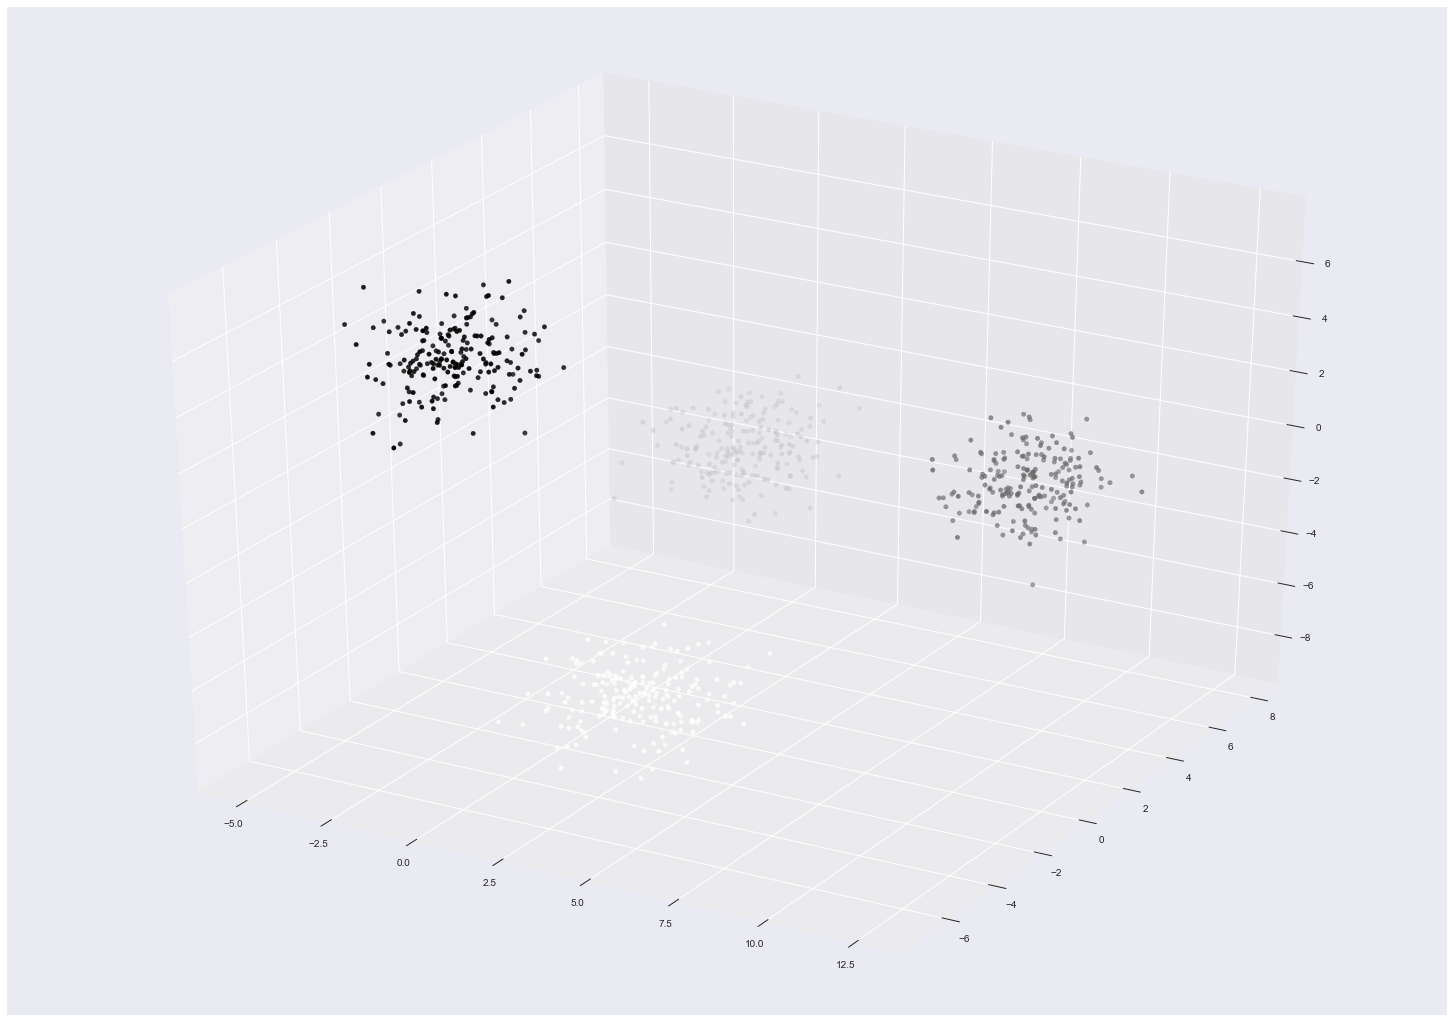

In [140]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], 
           X[:, 1], 
           X[:, 2], 
           c = y
          );

#### Na célula abaixo, implementamos um `kmeans` com $4$ centroides. Lembre-se que o `k-Means` é um modelo de predição, não transformação, portanto nosso foco será utilizar o [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict). Além disso, estamos falando se aprendizado não-supervisionado, portanto não há `labels`, treino ou teste, há somente a aplicação do algoritmo no `dataset`. Crie também um objeto `C` que recebe o atributo `cluster_centers_` do modelo. <br>

#### Dica: importar classe, instanciar modelo, `fitting`, `predict`. 

In [141]:
# importing libraries
from sklearn.cluster import KMeans

# Initializing KMeans
kmeans = KMeans(n_clusters = 4)

# Fitting with inputs
kmeans = kmeans.fit(X)

# Predicting the clusters
labels = kmeans.predict(X)

# Getting the cluster centers
C = kmeans.cluster_centers_

#### Vamos agora visualizar se nosso algoritmo deu certo:

Cluster  1
[ 0.97539985  4.3661875  -1.61345723]
Cluster  2
[-2.10872876 -3.06868236  4.66812604]
Cluster  3
[ 3.92641951 -4.32154363 -5.42941397]
Cluster  4
[ 9.59804372  3.64965739 -0.36885258]


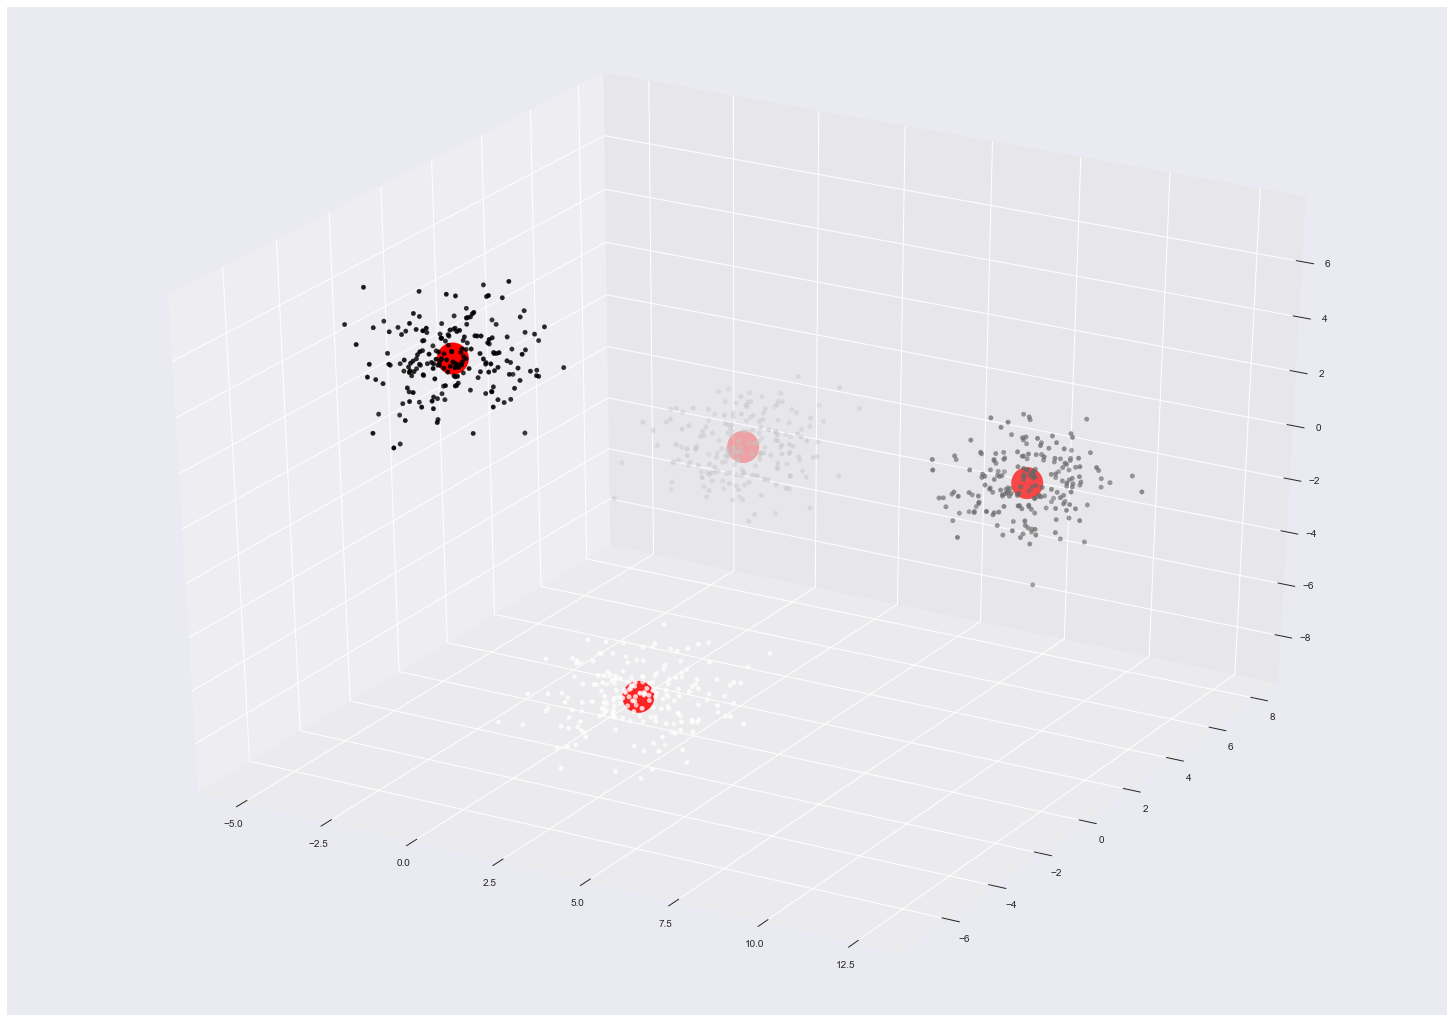

In [142]:
# plotando os clusters em 3-D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], 
           X[:, 1], 
           X[:, 2], 
           c = y
          )
ax.scatter(C[:, 0], 
           C[:, 1], 
           C[:, 2], 
           marker = 'o', 
           c = 'red', 
           s = 1000
          )
counter = 1

for cluster in C:
    print('Cluster ', counter)
    print(cluster)
    counter += 1

## Escolhendo o número de clusters para o K-Means

#### Numa análise visual, parece que conseguimos clusterizar nossos dados não categorizados de uma forma viável. Porém, já sabíamos que existiam $4$ `clusters`. Tente repetir o processo, mas com $2$ `clusters`. Os resultados, ficam estranhos, certo? Para isso, utilizamos o método [`Elbow`](https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203).

#### Construímos diversos `kMeans` com `k` dentro de um `range`, e plotamos sua inércia-variância. Numa análise intuitiva, caso escolhemos $1$ centróide, a variância será máxima, enquanto que com `k = n_samples`, a variância será $0$. Qual é o ponto de saturação para a variância no nosso `kMeans`? É justamente esse ponto de inflexão, o [cotovelo](https://jtemporal.com/kmeans-and-elbow-method/), que escolheremos como hiperparâmetro do nosso modelo.

#### Abaixo, vamos realizar esse exercício. Vamos criar um `loop for` indo de $1$ a $11$, em que iremos instanciar e fazer o ajuste do modelo em `X`, guardar e imprimir sua variância acessando o atributo `.inertia` do modelo. Por fim, iremos plotar o resultado e escolher um `k`:

1 39683.87351162204
2 22037.32785362758
3 9913.518408958907
4 2272.2740654943473
5 2105.1829480413394
6 1957.0225714132603
7 1826.9060494975133
8 1698.5536745271
9 1625.084064874487
10 1575.2501802281852


Text(0, 0.5, 'WSS')

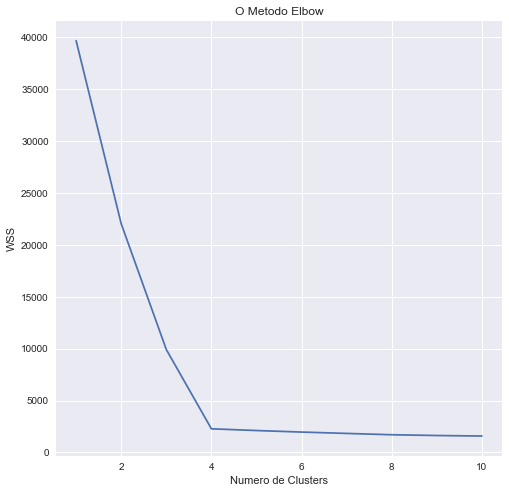

In [143]:
plt.figure(figsize = (8,8))

# plotando o gráfico do método elbow
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'random'
                   )
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') 

#### No exemplo acima, vemos que a saturação ocorre justamento quando $K = 4$, portanto ele é de fato nossa melhor escolha de hiperparâmetro. Vamos aplicar o `kMeans` num `dataset` mais interessante. 

___________

## KMeans: Exemplo - U.S. Household Power Consumption

<img src="uci.png" align="center" width="60%">

#### `Machine Learning` tem uma ampla gama de aplicações para o setor de energia. Um muito interessante é extrair `insights` sobre o comportamento de consumo de eletricidade. A maneira pela qual um indivíduo ou família usa energia ao longo do dia é também uma “impressão digital de energia”.

#### Veremos como encontrar padrões nos perfis de carga diários de uma única família com o algoritmo de clusterização `Kmeans`.

#### O [conjunto](https://www.kaggle.com/uciml/electric-power-consumption-data-set) de dados contém $2,075,259$ medidas coletadas entre dezembro de $2006$ e novembro de $2010$ ($47$ meses).

#### Vamos atacar o problema real: imagine que trabalhemos para a companhia elétrica dos EUA e queremos identificar perfis de usuários para criar produtos específicos para cada perfil. Quantos perfis temos e qual o comportamento de uso de energia diário deles? Para essas situações, é interessante usar métodos de `clustering`. 


#### Vamos Ler os dados em uma variável chamada `df_uci`. Vamos usar as colunas `'Date'`, `'Time'` e `'Global_active_power'`:

#### Lendo e verificando os dados

In [163]:
data_path =  'household_power_consumption.txt'
cols_to_use = ['Date', 'Time','Global_active_power']

df_uci = pd.read_csv(data_path, 
                     sep = ';', 
                     usecols = cols_to_use
                    )

#### Nas próximas células, vamos chamar os métodos explorátorios básicos de Pandas: `.info()` e `.head()`.

In [164]:
# verificandio o DataFrame
df_uci.head()

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


In [146]:
# verificando as informações básicas
df_uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 3 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Time                 object
 2   Global_active_power  object
dtypes: object(3)
memory usage: 47.5+ MB


#### Usamos a biblioteca [missingno](https://github.com/ResidentMario/missingno) e verificar se existem dados nulos.

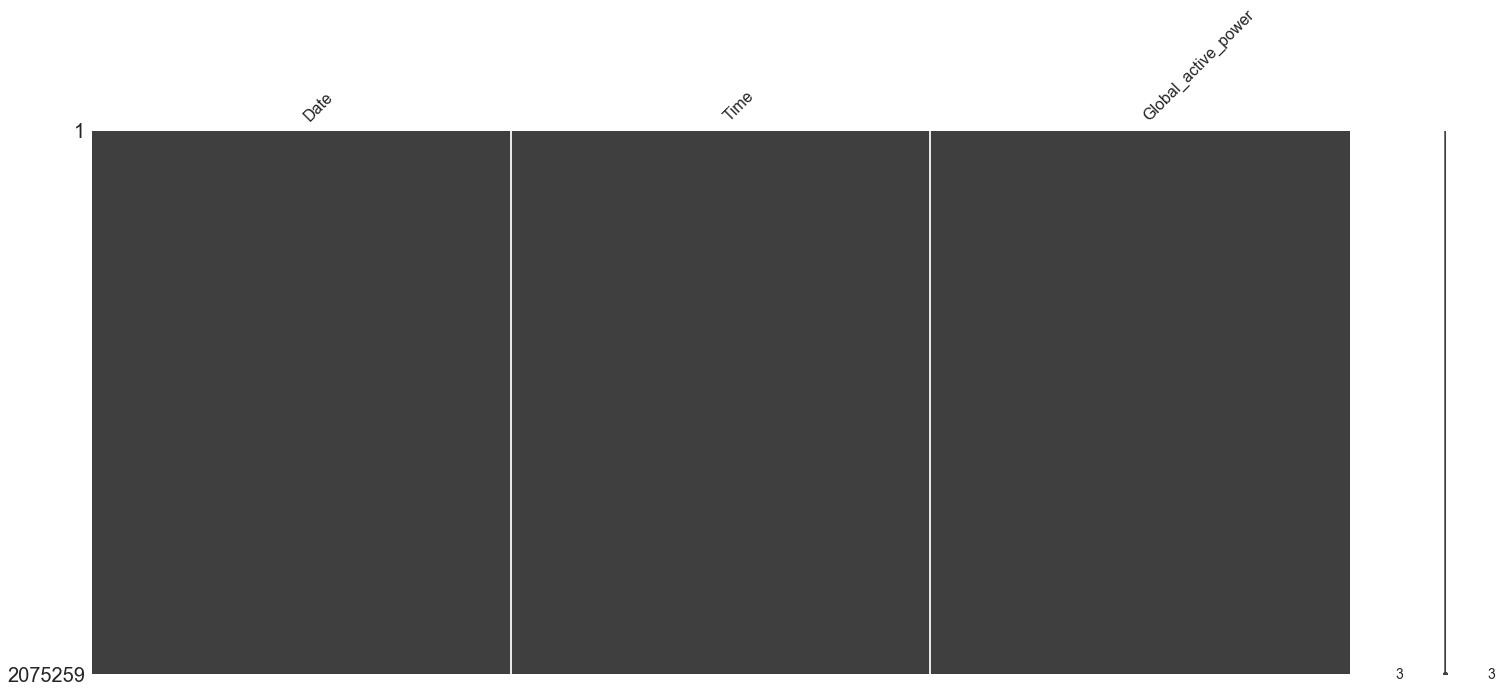

In [147]:
#!pip install missingno
import missingno as msno
msno.matrix(df_uci);

## Feature Engineering

#### Na célula abaixo, vamos fazer uma tranformação de `date` para `datetime`, isso vai facilitar as análises.

In [148]:
%%time
#Wall time: 5min 14s

# juntando os dados de tempo com data e hora
plt.style.use('seaborn')

df_uci['datetime'] = pd.to_datetime(df_uci['Date'] + ' '+ df_uci['Time'])
df_uci = df_uci.drop(['Date','Time'], 
                     axis = 1
                    )
df_uci = df_uci.set_index('datetime')

CPU times: user 3min 47s, sys: 2.49 s, total: 3min 50s
Wall time: 4min 38s


In [149]:
df_uci.head()

,Global_active_power
datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


#### Verificamos a existência de campos nulos.

In [150]:
df_uci.isnull().sum()

Global_active_power    0
dtype: int64

#### Se ainda tivermos o problema de algumas células estarem com valor nulo. Vamos limpar isso:

In [151]:
df_uci = df_uci.replace('?', 
                        np.nan
                       )
df_uci = df_uci.astype(np.float).fillna(method = 'bfill')

#### Finalmente, vamos fazer um [`resampling`](https://kmeans-smote.readthedocs.io/en/latest/) de nosso `dataset` para entendermos, hora a hora, como é o consumo de energia dos cidadãos americanos. Vamos reamostrar de modo que cada linha represente uma hora inteira:

CPU times: user 5.71 s, sys: 884 ms, total: 6.6 s
Wall time: 10.8 s


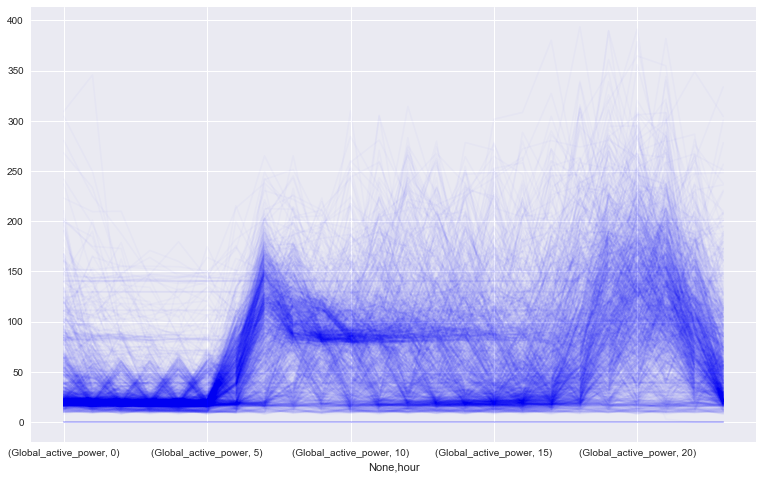

In [152]:
%%time
# wall time 41.1s

np.random.seed(123)

# obter o consumo por hora
df_uci_hourly = df_uci.resample('H').sum()   
df_uci_hourly['hour'] = df_uci_hourly.index.hour
df_uci_hourly.index = df_uci_hourly.index.date

df_uci_pivot = df_uci_hourly.pivot(columns = 'hour')
df_uci_pivot = df_uci_pivot.dropna()

df_uci_pivot.T.plot(figsize = (13, 8), 
                    legend = False, 
                    color = 'blue', 
                    alpha = 0.02
                   );

## Rodando o K-Means

#### Precisamos nos lembrar que `kMeans` é um algoritmo que calcula distâncias. Para quase todo algoritmo que calcula distâncias, vamos ter que usar um [`scaling`](https://medium.com/analytics-vidhya/practical-approach-to-kmeans-clustering-python-and-why-scaling-is-important-44ac0b0fea47) para padronizar a escala dos atributos que temos. Portanto, na célula abaixo, aplicamos o [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [153]:
# definindo as variáveis de entrada
X = df_uci_pivot.values.copy()

In [154]:
# importando a biblioteca do Scaler
from sklearn.preprocessing import MinMaxScaler
 
# Very important to scale!
sc = MinMaxScaler()
X = sc.fit_transform(X)

## Número de Clusters - Método Elbow

1 845.543862599574
2 673.3747549898768
3 598.4269730642163
4 539.8932250190102
5 510.323350383588
6 485.2946753840258
7 465.23415247573865
8 451.9683762647666
9 440.2782669725793
10 428.4122924941836


Text(0, 0.5, 'WSS')

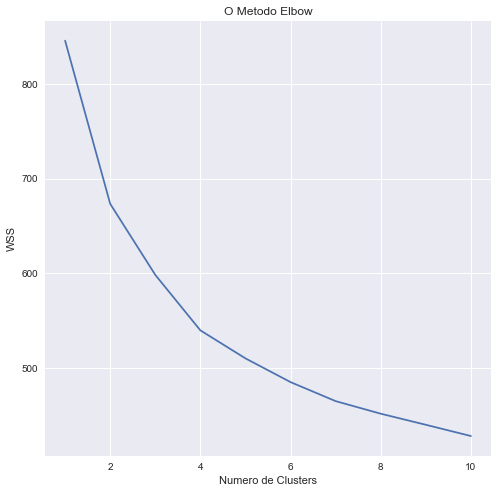

In [155]:
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

plt.figure(figsize = (8, 8))

# plotando o gráfico do método elbow
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'random'
                   )
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS')

## Número de Clusters - Método Silhouette

#### Agora que transformamos nossos dados, podemos usar algum método para descobrir o melhor número de `clusters`. Já vimos o método de cotovelo, mas dessa vez utilizaremos o [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), que é uma métrica `built-in`, de $-1$ a $1$, que nos diz quão semelhante um ponto é em relação a seu `cluster` em comparação aos outros `clusters`.

#### A variância ideal é aquela mais perto de $1$, por isso queremos o maior `silhouette score`.

In [156]:
# plotando o silhouette score
from sklearn.metrics import silhouette_score   

sillhoute_scores = []
n_cluster_list = np.arange(2,31).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters = n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

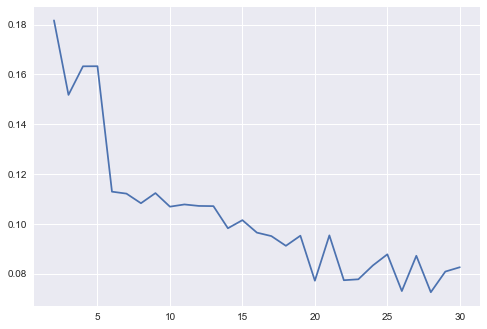

In [157]:
plt.plot(n_cluster_list,sillhoute_scores) # 

#### O melhor silhouette score é o $2$ - separando em dois `clusters`, frio e calor.

Text(0.5, 0, 'hour')

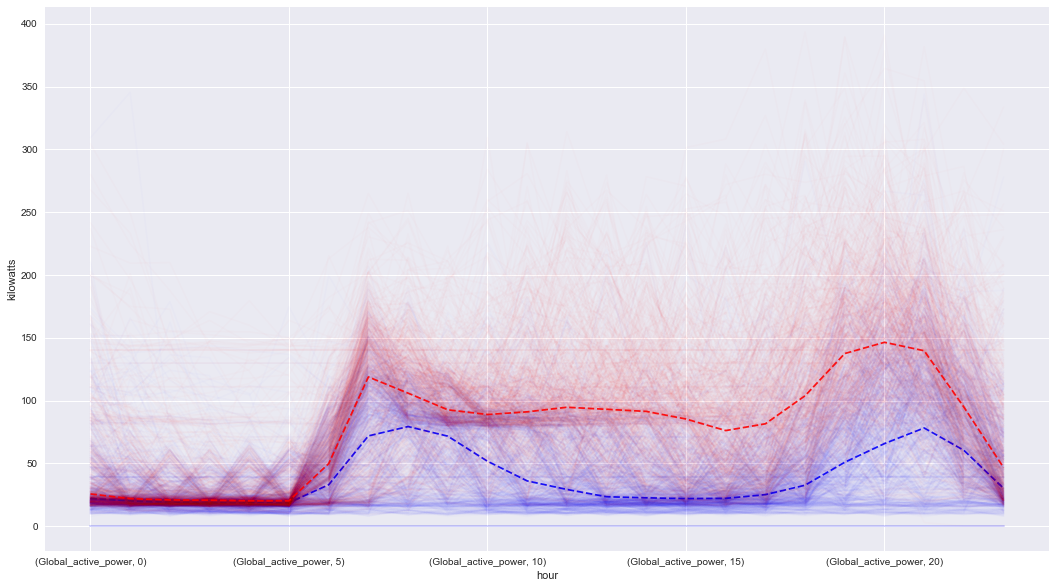

In [158]:
# utilizando o K-Means com 2 clusters

copia = df_uci_pivot.copy()
kmeans = KMeans(n_clusters = 2)

cluster_found = kmeans.fit_predict(X)
cluster_found_sr = pd.Series(cluster_found, 
                             name = 'cluster'
                            )
copia = copia.set_index(cluster_found_sr, 
                        append = True
                       )

fig, ax= plt.subplots(1, 1, figsize = (18, 10))

color_list = ['blue', 
              'red', 
              'green', 
              'black'
             ]

cluster_values = sorted(copia.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values, color_list):
    copia.xs(cluster, 
             level = 1
            ).T.plot(ax = ax, 
                     legend = False, 
                     alpha = 0.01, 
                     color = color
                    )
    copia.xs(cluster, 
             level = 1).median().plot(ax = ax, 
                                      color = color, 
                                      alpha = 0.9, 
                                      ls = '--'
                                     )
#ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
#ax.legend()

#### Vamos explorar $3$ `clusters`.

Text(0.5, 0, 'hour')

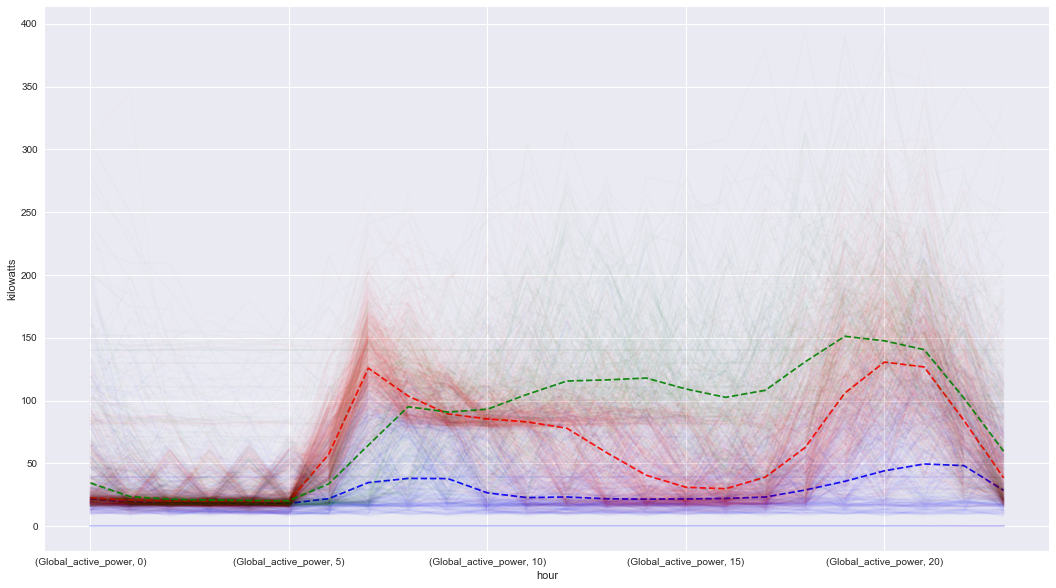

In [159]:
# utilizando o K-Means com 3 clusters
copia = df_uci_pivot.copy()
kmeans = KMeans(n_clusters = 3)

cluster_found = kmeans.fit_predict(X)
cluster_found_sr = pd.Series(cluster_found, 
                             name = 'cluster'
                            )

copia = copia.set_index(cluster_found_sr, 
                        append = True
                       )

fig, ax= plt.subplots(1, 1, figsize = (18, 10))

color_list = ['blue', 
              'red', 
              'green', 
              'black'
             ]
cluster_values = sorted(copia.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values, color_list):
    copia.xs(cluster, 
             level = 1).T.plot(ax = ax, 
                               legend = False, 
                               alpha = 0.01, 
                               color = color
                              )
    
    copia.xs(cluster, 
             level = 1).median().plot(ax = ax, 
                                      color = color, 
                                      alpha = 0.9, 
                                      ls = '--'
                                     )

#ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
#ax.legend()

#### Vamos explorar $4$ `clusters`.

Text(0.5, 0, 'hour')

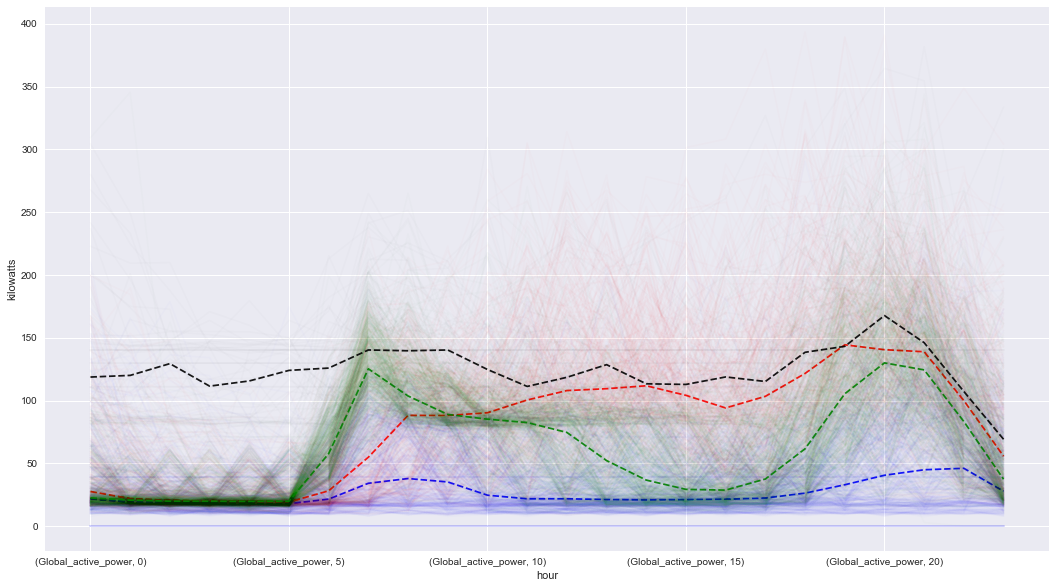

In [160]:
# utilizando o K-Means com 4 clusters
copia = df_uci_pivot.copy()
kmeans = KMeans(n_clusters = 4)

cluster_found = kmeans.fit_predict(X)
cluster_found_sr = pd.Series(cluster_found, 
                             name = 'cluster'
                            )

copia = copia.set_index(cluster_found_sr, append = True)

fig, ax= plt.subplots(1, 1, figsize = (18, 10))

color_list = ['blue', 
              'red', 
              'green', 
              'black'
             ]
cluster_values = sorted(copia.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values, color_list):
    copia.xs(cluster, 
             level = 1).T.plot(ax = ax, 
                               legend = False, 
                               alpha = 0.01, 
                               color = color
                              )
    copia.xs(cluster, 
             level = 1).median().plot(ax = ax, 
                                      color = color, 
                                      alpha = 0.9, 
                                      ls = '--'
                                     )
#ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
#ax.legend()

In [161]:
#### Vamos explorar $5$ `clusters`.

Text(0.5, 0, 'hour')

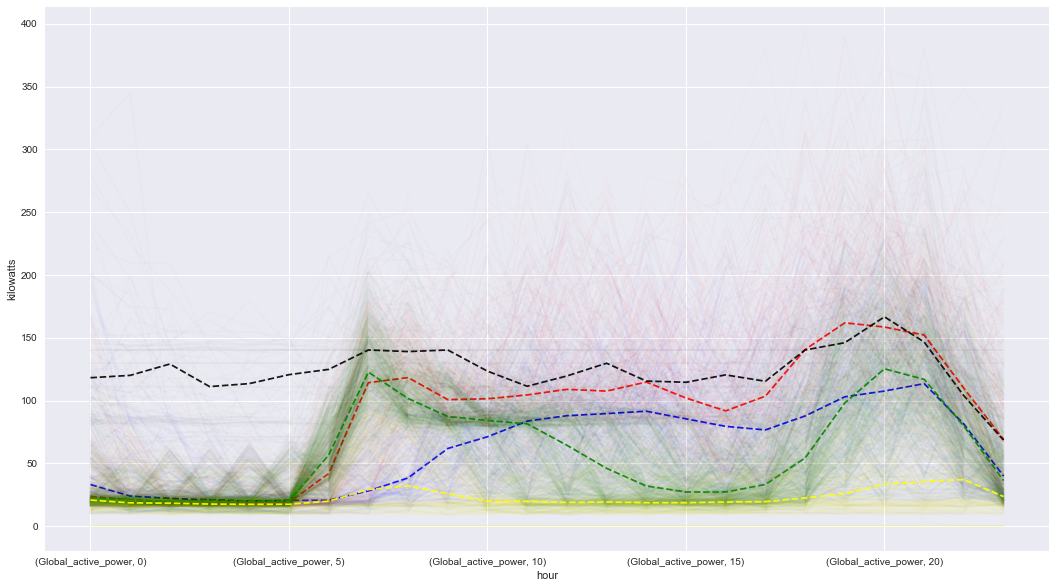

In [162]:
# utilizando o K-Means com 5 clusters
copia = df_uci_pivot.copy()
kmeans = KMeans(n_clusters = 5)

cluster_found = kmeans.fit_predict(X)
cluster_found_sr = pd.Series(cluster_found, 
                             name = 'cluster'
                            )
copia = copia.set_index(cluster_found_sr, append = True)

fig, ax = plt.subplots(1, 1, figsize = (18, 10))

color_list = ['blue', 
              'red', 
              'green', 
              'black', 
              'yellow'
             ]
cluster_values = sorted(copia.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values, color_list):
    copia.xs(cluster, 
             level = 1).T.plot(ax = ax, 
                               legend = False, 
                               alpha = 0.01, 
                               color = color
                              )
    copia.xs(cluster, level = 1).median().plot(ax = ax, 
                                               color = color, 
                                               alpha = 0.9, 
                                               ls = '--'
                                              )

#ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
#ax.legend()